<img src='https://miro.medium.com/v2/da:true/resize:fit:933/0*awbekd-RK9TrISOn'>

## Import Necessary Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [13]:
titanic=pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/titanic.csv?raw=True')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Info

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking Null Values

In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

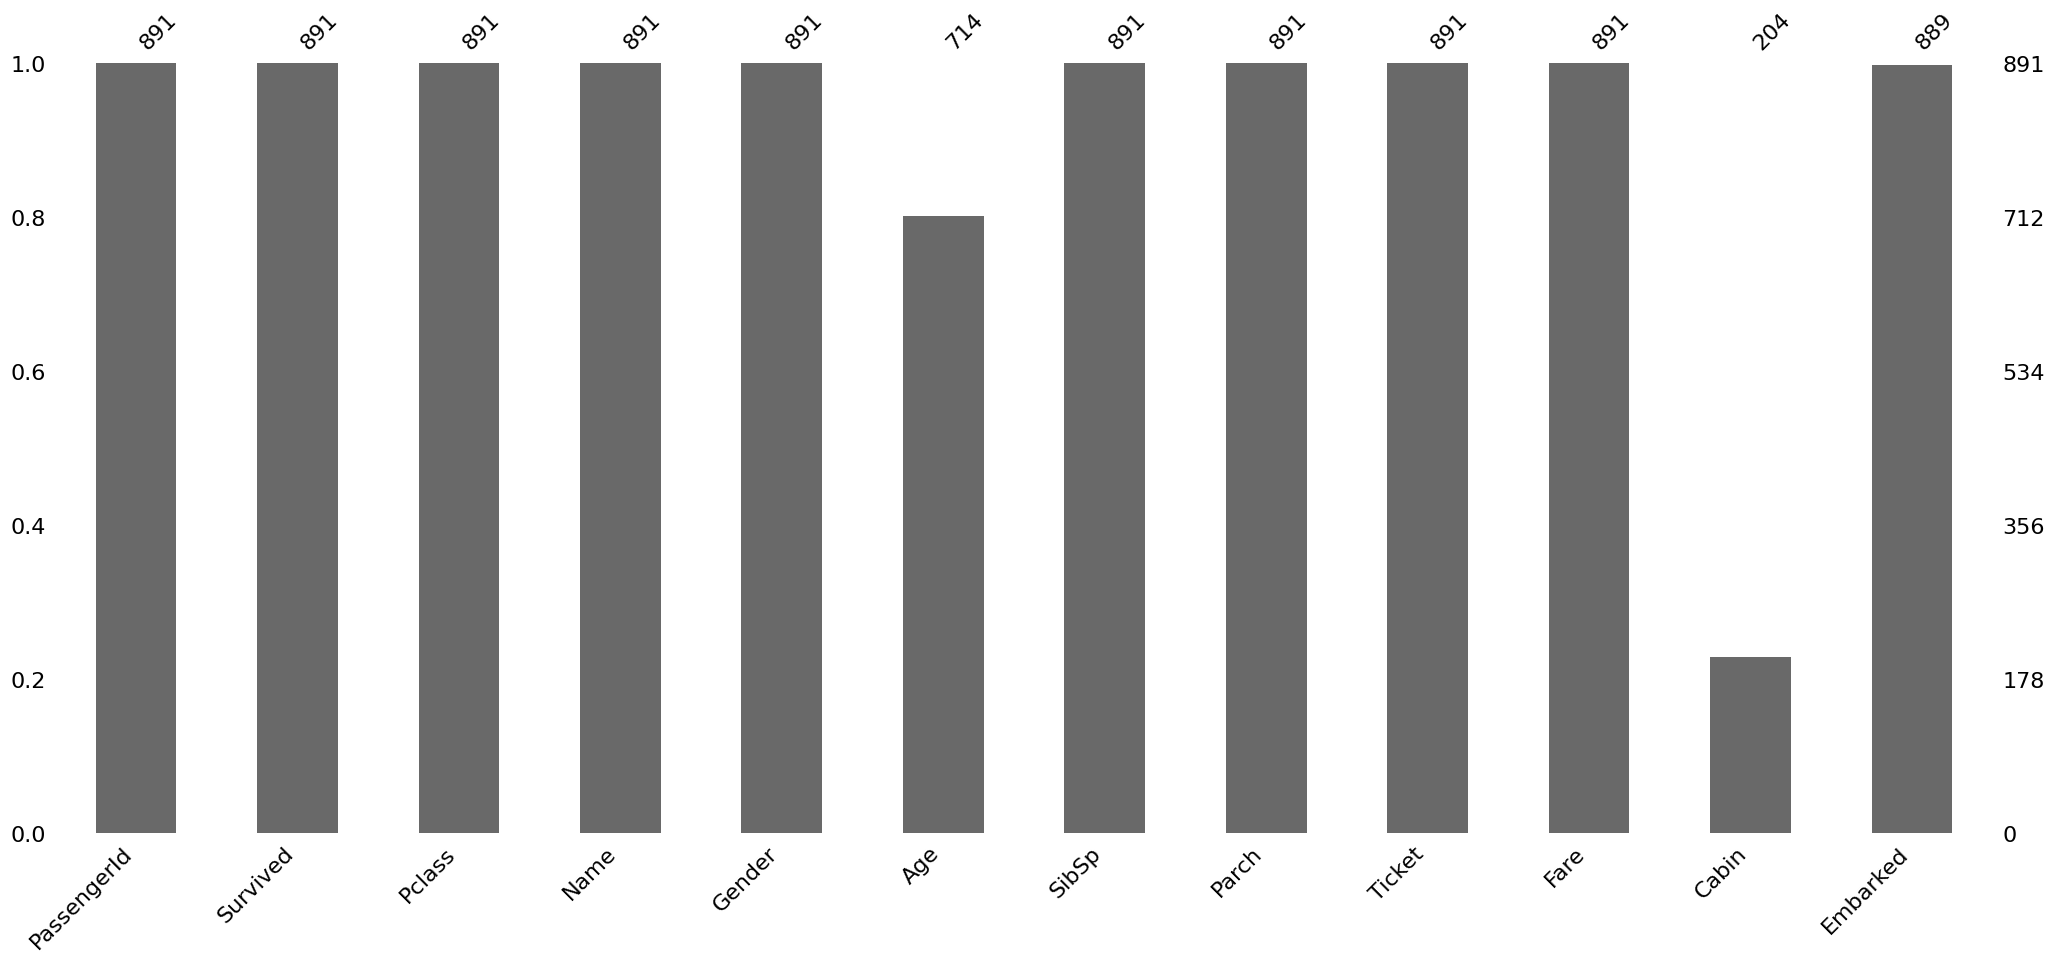

In [16]:
msno.bar(titanic)

<Axes: >

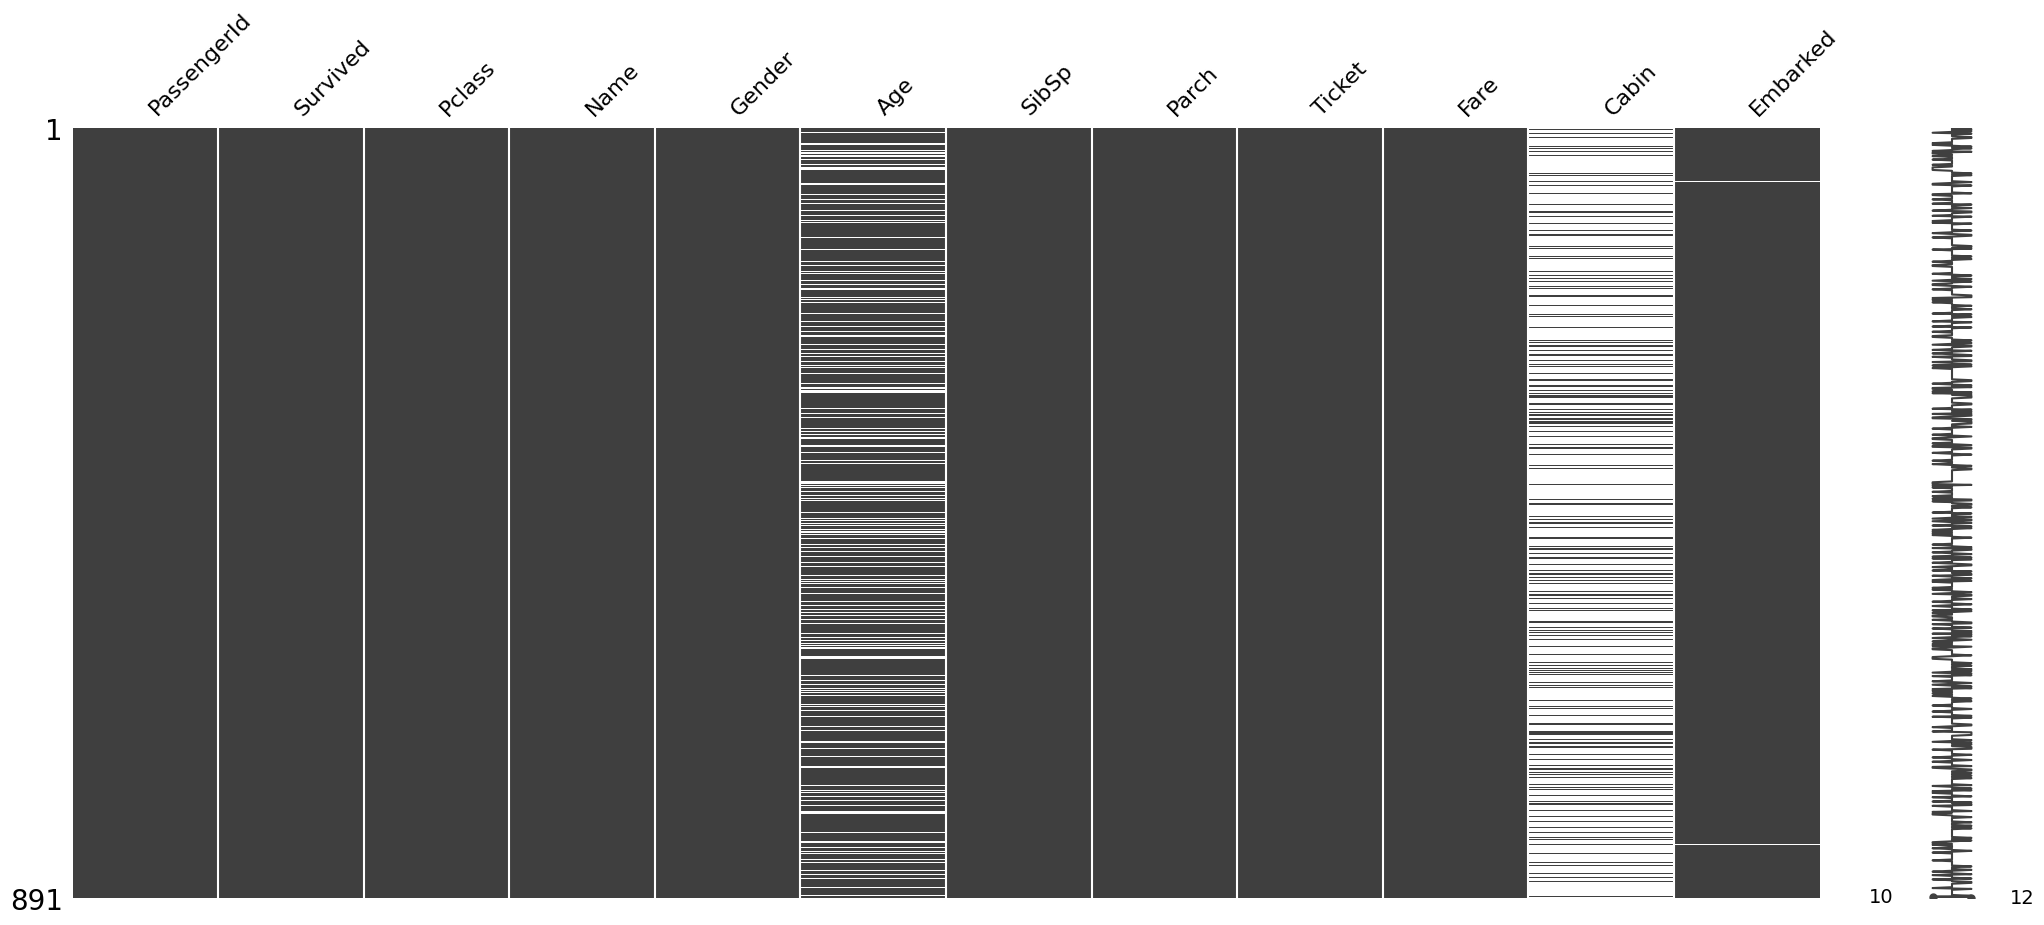

In [17]:
msno.matrix(titanic)
# it show that the null values are scattered among the whole dataset

#### the above matrix graph shows that ,Age and Cabin(mostly empty) have null values and these values are scattered over the whole column.there is not a particular pattern

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Count'>

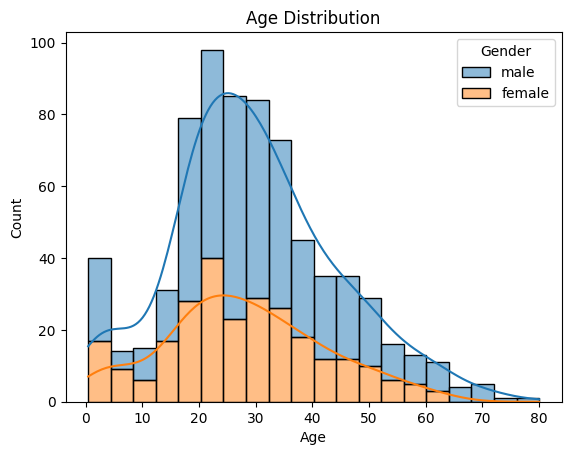

In [18]:
plt.title('Age Distribution')
sns.histplot(data=titanic, x='Age',kde=True,hue='Gender',multiple='stack')

<Axes: title={'center': 'Gender Distribution'}, xlabel='Gender', ylabel='count'>

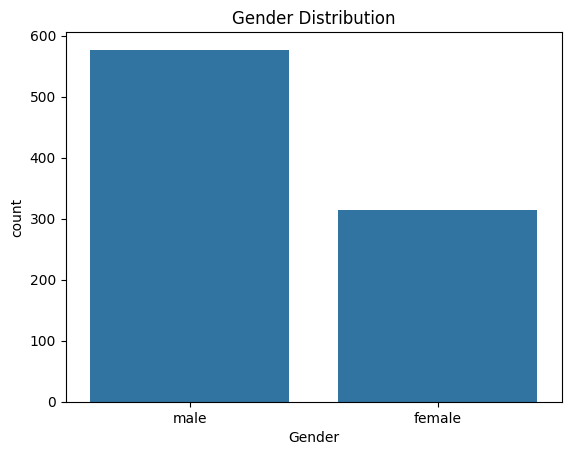

In [19]:
plt.title('Gender Distribution')
sns.countplot(x=titanic['Gender'])

<Axes: title={'center': 'Survival Distribution Among Genders'}, xlabel='Survived', ylabel='count'>

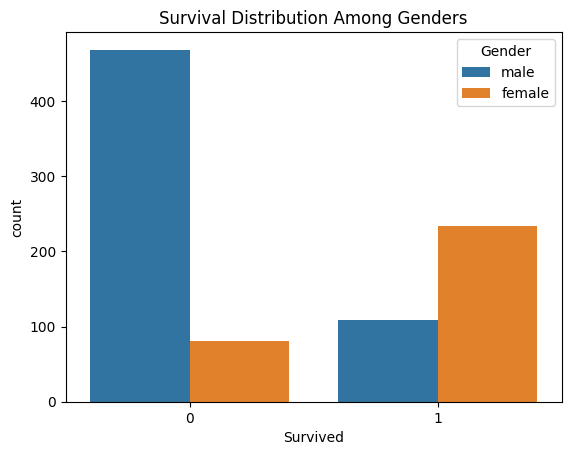

In [20]:
plt.title('Survival Distribution Among Genders')
sns.countplot(data=titanic,x='Survived',hue='Gender')

<Axes: title={'center': 'Age Distribution among Different Classes'}, xlabel='Age', ylabel='Count'>

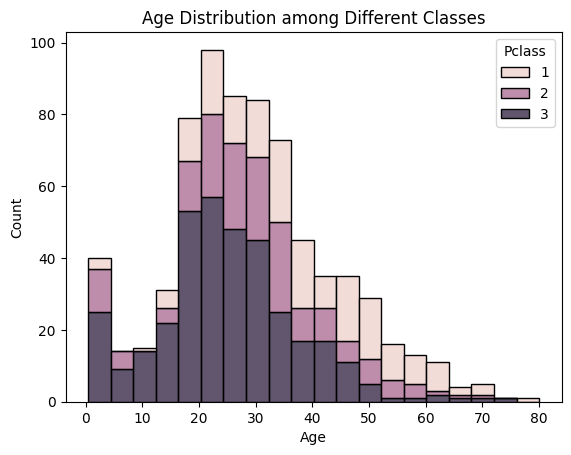

In [21]:
plt.title('Age Distribution among Different Classes')
sns.histplot(data=titanic, x='Age',hue='Pclass',multiple="stack")

<Axes: title={'center': 'Age Vs. Fare'}, xlabel='Age', ylabel='Fare'>

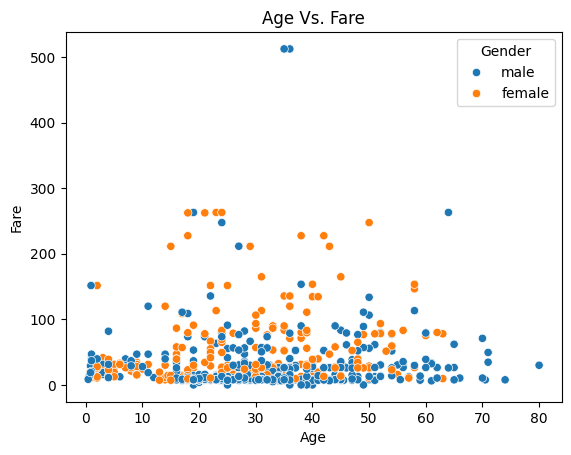

In [22]:
plt.title('Age Vs. Fare')
sns.scatterplot(data=titanic,x='Age',y='Fare',hue='Gender')

#### from above figure we can see that there is no defined relation between age and fare

<Axes: title={'center': 'Age Vs. Fare'}, xlabel='Age', ylabel='Fare'>

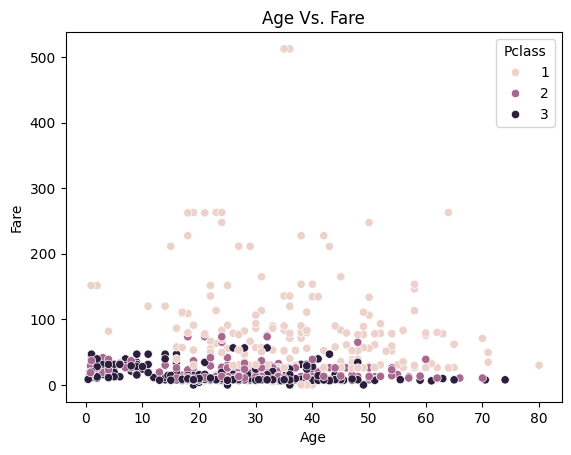

In [23]:
plt.title('Age Vs. Fare')
sns.scatterplot(data=titanic,x='Age',y='Fare',hue='Pclass')

<Axes: title={'center': 'Class Distribution among Different Genders'}, xlabel='Pclass', ylabel='count'>

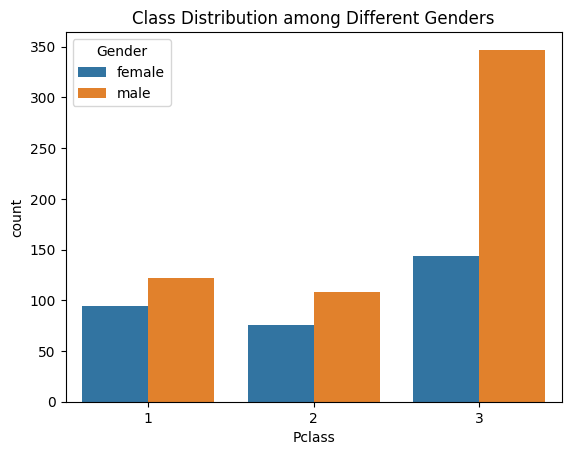

In [24]:
plt.title('Class Distribution among Different Genders')
sns.countplot(x=titanic['Pclass'],hue=titanic['Gender'])

<Axes: title={'center': 'Boxplot of Pclass Vs Age'}, xlabel='Pclass', ylabel='Age'>

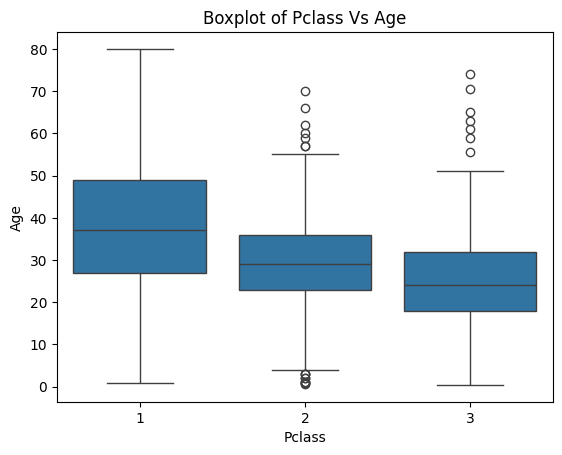

In [25]:
plt.title('Boxplot of Pclass Vs Age')
sns.boxplot(data=titanic,x='Pclass',y='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

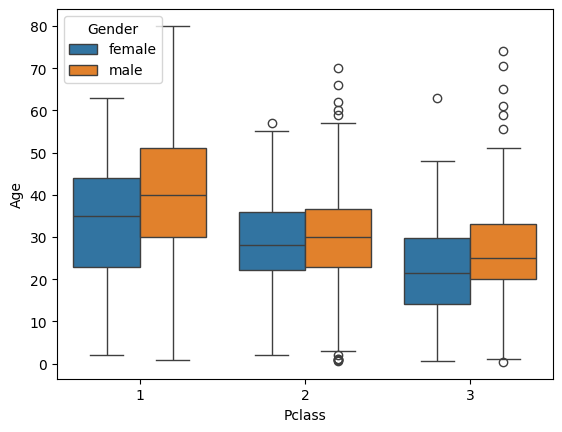

In [26]:
sns.boxplot(data=titanic,x='Pclass',y='Age',hue='Gender')

## <b> Fill Missing Values</b>

In [27]:
titanic.groupby(['Pclass','Gender'])['Age'].median().reset_index()

,Pclass,Gender,Age
0,1,female,35.0
1,1,male,40.0
2,2,female,28.0
3,2,male,30.0
4,3,female,21.5
5,3,male,25.0


In [28]:
titanic.groupby(['Pclass','Gender']).median(numeric_only=True).reset_index()

,Pclass,Gender,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,female,447.0,1.0,35.0,0.0,0.0,82.66455
1,1,male,480.5,0.0,40.0,0.0,0.0,41.26250
2,2,female,439.5,1.0,28.0,0.0,0.0,22.00000
3,2,male,416.5,0.0,30.0,0.0,0.0,13.00000
4,3,female,376.0,0.5,21.5,0.0,0.0,12.47500
5,3,male,466.0,0.0,25.0,0.0,0.0,7.92500


In [29]:
def fill_age(row):
    pclass=row[0]
    age=row[1]
    gender=row[2]
    if pd.isnull(age):
        if pclass==1:
            if gender=='male':
                return 40
            else:
                return 35
        elif pclass==2:
            if gender=='male':
                return 30
            else:
                return 28
        elif pclass==3:
            if gender=='male':
                return 25
            else:
                return 21
        
    else:
        return age

In [30]:
titanic['Age'] =titanic[['Pclass','Age','Gender']].apply(fill_age,axis=1)


C:\Users\diksh\AppData\Local\Temp\ipykernel_6184\2624684537.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=row[0]
C:\Users\diksh\AppData\Local\Temp\ipykernel_6184\2624684537.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=row[1]
C:\Users\diksh\AppData\Local\Temp\ipykernel_6184\2624684537.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gender=row[2]


In [31]:
titanic['Cabin']= titanic['Cabin'].apply(lambda val: 0 if pd.isnull(val) else 1)

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [33]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [34]:
titanic.dropna(inplace=True)

In [35]:
titanic.reset_index(drop=True,inplace=True)

In [36]:
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

# Using 'Feature engineering,' to create new features from the original data

In [37]:
from sklearn.preprocessing import LabelEncoder


In [38]:
label_encoder=LabelEncoder()

In [39]:
label_encoder.fit(titanic['Gender'])

LabelEncoder()

In [40]:
titanic['Gender']=label_encoder.transform(titanic['Gender'])

In [41]:
# covert the embark column to numeric value using one hot encoder

In [42]:
from sklearn.preprocessing import OneHotEncoder


In [43]:
one_hot_encoder=OneHotEncoder()

In [44]:
one_hot_encoder.fit(titanic[['Embarked']])

OneHotEncoder()

In [45]:
one_hot_encoder.transform(titanic[['Embarked']])

<889x3 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [46]:
temp=one_hot_encoder.transform(titanic[['Embarked']]).toarray()

In [47]:
one_hot_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [48]:
temp_data=pd.DataFrame(temp,columns=['C', 'Q', 'S'],dtype='int')

In [49]:
titanic=pd.concat([titanic,temp_data],axis=1)

In [50]:
titanic.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,S,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,C,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,S,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,S,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,S,0,0,1


In [59]:
titanic.drop('Embarked',axis=1,inplace=True)

In [60]:
titanic.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,1


# Build and Tune the Model

In [62]:
X=titanic.drop('Survived',axis=1)

In [63]:
Y=titanic['Survived']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)


In [66]:
from sklearn.linear_model import LogisticRegression


In [67]:
logistic_regression=LogisticRegression()

In [68]:
logistic_regression.fit(X_train, Y_train)

C:\Users\diksh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
predictions=logistic_regression.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report

In [71]:
print(confusion_matrix(predictions,Y_test))

[[97 22]
 [10 49]]


In [72]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       119
           1       0.69      0.83      0.75        59

    accuracy                           0.82       178
   macro avg       0.80      0.82      0.81       178
weighted avg       0.83      0.82      0.82       178

